<a href="https://colab.research.google.com/github/shivaanginidoctor/shivaanginiii2/blob/main/logisticregg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import gdown
import pandas as pd

file_id = '1-e3oa8IAgmjkikjirxHObjDXpiY0g51i'
output_file = 'Gotem Pumpkins.csv'


download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, output_file, quiet=False)
train = pd.read_csv(output_file, sep=',')
train = pd.read_csv(output_file, sep=',')

Downloading...
From: https://drive.google.com/uc?id=1-e3oa8IAgmjkikjirxHObjDXpiY0g51i
To: /content/Gotem Pumpkins.csv
100%|██████████| 216k/216k [00:00<00:00, 5.38MB/s]


In [ ]:
import gdown
import pandas as pd

file_id = '1GMoK_4HOLIjCLuIdRD6pmLhSy1ymykQP'
output_file = 'Freyja_Pumpkins.csv'


download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, output_file, quiet=False)
test = pd.read_csv(output_file, sep=',')
test = pd.read_csv(output_file, sep=',')

Downloading...
From: https://drive.google.com/uc?id=1GMoK_4HOLIjCLuIdRD6pmLhSy1ymykQP
To: /content/Freyja_Pumpkins.csv
100%|██████████| 53.7k/53.7k [00:00<00:00, 31.8MB/s]


In [ ]:
def extract(value):
    try:
        return float(value.split()[0])
    except:
        return np.nan

In [ ]:
# Display basic information about the dataset
print(train.info())

# Check for missing values
print(train.isnull().sum())

# Display the first few rows
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   Area               2000 non-null   int64  
 2   Perimeter          2000 non-null   float64
 3   Major_Axis_Length  2000 non-null   float64
 4   Minor_Axis_Length  2000 non-null   float64
 5   Convex_Area        2000 non-null   int64  
 6   Equiv_Diameter     2000 non-null   float64
 7   Eccentricity       2000 non-null   float64
 8   Solidity           2000 non-null   float64
 9   Extent             2000 non-null   float64
 10  Roundness          2000 non-null   float64
 11  Aspect_Ration      2000 non-null   float64
 12  Compactness        2000 non-null   float64
 13  Class              2000 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 218.9+ KB
None
Unnamed: 0           0
Area                 0
Perimeter

In [ ]:
train['Class'] = train['Class'].map({'Ürgüp Sivrisi': 1, 'Çerçevelik': 0})
test['Class'] = test['Class'].map({'Ürgüp Sivrisi': 1, 'Çerçevelik': 0})

In [ ]:
X_train = train.drop(columns=['Class']).values
y_train = train['Class'].values

X_test = test.drop(columns=['Class']).values
y_test = test['Class'].values

In [ ]:
# Normalization
def mean_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost_logistic(X, y, theta, b, lambda_=0.1):
    m = len(y)
    z = np.dot(X, theta) + b
    predictions = sigmoid(z)

    # Compute the cost (logistic loss)
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Compute the regularization term
    reg_cost = (lambda_ / (2 * m)) * np.sum(theta ** 2)

    total_cost = cost + reg_cost
    return total_cost

In [ ]:
def gradientDescent(X, y, theta, b, learning_rate, iterations, lambda_=0.1):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        z = np.dot(X, theta) + b
        predictions = sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (predictions - y)) + (lambda_ / m) * theta
        db = (1 / m) * np.sum(predictions - y)

        theta -= learning_rate * dw
        b -= learning_rate * db

        cost = compute_cost_logistic(X, y, theta, b, lambda_)
        cost_history.append(cost)

    return theta, b, cost_history

In [ ]:
def predict(X, theta, b):
    z = np.dot(X, theta) + b
    probabilities = sigmoid(z)
    return [1 if p >= 0.5 else 0 for p in probabilities]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

theta = np.zeros(X_train_scaled.shape[1])
b = 0


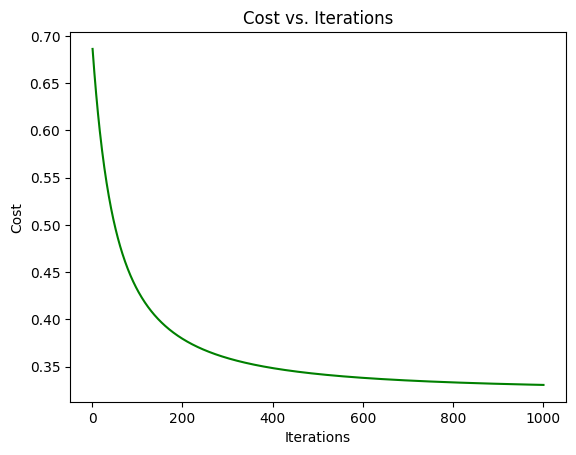

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
iterations=1000
learning_rate=0.01

theta, b, cost_history = gradientDescent(X_train_scaled, y_train, theta, b, learning_rate, iterations)
plt.plot(range(1, iterations + 1), cost_history, color="green")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()


In [ ]:
y_pred = predict(X_test_scaled, theta, b)

accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 88.00%


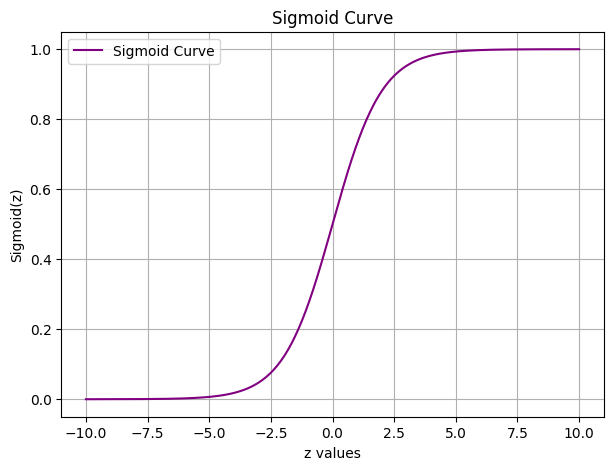

In [ ]:
z_values = np.linspace(-10, 10, 400)

sigmoid_predictions = sigmoid(z_values)

# Plotting the Sigmoid curve
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(z_values, sigmoid_predictions, color="purple", label="Sigmoid Curve")
ax.set_title("Sigmoid Curve")
ax.set_xlabel("z values")
ax.set_ylabel("Sigmoid(z)")
ax.grid(True)
ax.legend()
plt.show()

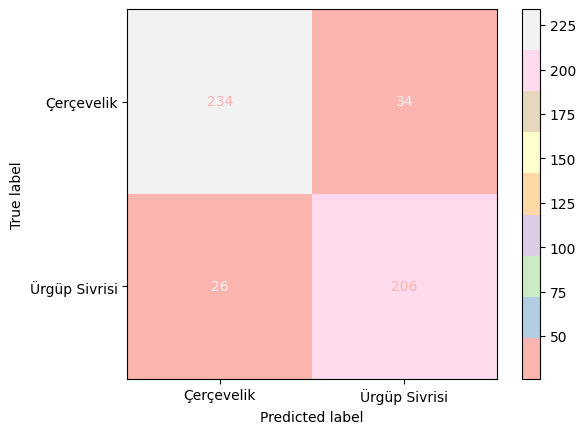

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Çerçevelik', 'Ürgüp Sivrisi'])
cmd.plot(cmap="Pastel1")

plt.show()